In [7]:
import csv


myFile = open('lockedEndList.txt', "r") 
data = myFile.read()
lockedEndList = data.split("\n")
print(lockedEndList)
myFile.close()

myFile = open('lockedDerivedAmountList.txt', "r")
data = myFile.read()
lockedDerivedAmountList = data.split("\n")
print(lockedDerivedAmountList)
myFile.close()



['0', '1672272000', '1671667200', '1698278400', '1680739200', '1698278400', '0', '1696464000', '1698278400', '1689811200', '0', '0', '0', '1672876800', '1698278400', '1681344000', '1697068800', '1695859200', '1697673600', '1697068800', '1698278400', '1695859200', '0', '1687392000', '1697068800', '1698278400', '0', '1695254400', '0', '1694649600', '1694044800', '1681344000', '1689206400', '0', '1691020800', '0', '1697673600', '0', '0', '0', '0', '1681344000', '0', '0', '1697673600', '0', '1681344000', '1689811200', '1681344000', '1692835200', '1691020800', '1681344000', '1685577600', '1689811200', '0', '0', '0', '1691625600', '1681344000', '0', '1681344000', '0', '1689206400', '1691020800', '0', '0', '1690416000', '0', '0', '1692230400', '0', '0', '0', '1691625600', '0', '1681948800', '1691020800', '0', '0', '0', '0', '0', '1698278400', '1681948800', '0', '0', '0', '1692835200', '1681948800', '0', '0', '0', '1696464000', '0', '0', '1691625600', '1688601600', '1689811200', '1689811200', 

In [8]:
lockedEndListFormatted = []
for i in range(len(lockedEndList)):
    if lockedEndList[i] == '':
        continue
    if lockedEndList[i] == '0':
        lockedEndListFormatted.append(0)
    else:
        lockedEndListFormatted.append((int(lockedEndList[i])/86400-19358))
print(lockedEndListFormatted)

[0, -3.0, -10.0, 298.0, 95.0, 298.0, 0, 277.0, 298.0, 200.0, 0, 0, 0, 4.0, 298.0, 102.0, 284.0, 270.0, 291.0, 284.0, 298.0, 270.0, 0, 172.0, 284.0, 298.0, 0, 263.0, 0, 256.0, 249.0, 102.0, 193.0, 0, 214.0, 0, 291.0, 0, 0, 0, 0, 102.0, 0, 0, 291.0, 0, 102.0, 200.0, 102.0, 235.0, 214.0, 102.0, 151.0, 200.0, 0, 0, 0, 221.0, 102.0, 0, 102.0, 0, 193.0, 214.0, 0, 0, 207.0, 0, 0, 228.0, 0, 0, 0, 221.0, 0, 109.0, 214.0, 0, 0, 0, 0, 0, 298.0, 109.0, 0, 0, 0, 235.0, 109.0, 0, 0, 0, 277.0, 0, 0, 221.0, 186.0, 200.0, 200.0, 193.0, 193.0, 116.0, 0, 193.0, 0, 116.0, 235.0, 0, 214.0, 0, 235.0, 116.0, 0, 0, 0, 207.0, 0, 0, 0, 0, 0, 0, 123.0, 0, 291.0, 0, 0, 298.0, 0, 0, 0, 0, 0, 0, 0, 0, 172.0, 130.0, 270.0, 249.0, 130.0, 0, 130.0, 0, 235.0, 0, 130.0, 130.0, 0, 0, 165.0, 0, 130.0, 130.0, 200.0, 0, 298.0, 193.0, 207.0, 151.0, 0, 137.0, 221.0, 0, 144.0, 144.0, 0, 144.0, 270.0, 46.0, 0, 0, 46.0, 144.0, 0, 0, 144.0, 144.0, 144.0, 144.0, 46.0, 151.0, 151.0, 0, 0, 0, 53.0, 0, 151.0, 151.0, 53.0, 0, 151.0, 1

In [9]:
lockedDerivedAmountListFormatted = []
for i in range(len(lockedDerivedAmountList)):
    if lockedEndList[i] == '':
        continue
    else:
        lockedDerivedAmountListFormatted.append(int(lockedDerivedAmountList[i]) * 10**-18)
print(lockedDerivedAmountListFormatted)

[0.0, 5.432697172203327, 0.1, 6025.871880589281, 499.5244251291702, 76211.36196365305, 0.0, 9097143.812162118, 5344249.610559565, 184443.65155209077, 0.0, 0.0, 0.0, 0.30000000000000004, 8498459.87667031, 3484.952680746372, 89044.2445033141, 113411.93198274415, 1656267.7988607213, 8627.014701116062, 1048954.617678732, 105784.0047925471, 0.0, 715.3470251157206, 18255.036375178363, 62456.40833485862, 0.0, 96910.62694754622, 0.0, 19138.04371429298, 4789.905507310209, 528.0805485761438, 3649.018601166716, 0.0, 233941.8487019429, 0.0, 113728.32494934925, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 27818.544766081748, 0.0, 506.0693388745604, 14590785.220091775, 3974.3567105856537, 34792.01100637889, 4162.645605130653, 15757.83067803995, 529.4973242441553, 11036.431054273437, 0.0, 0.0, 0.0, 5849702.1451754635, 46740.547268634, 0.0, 343.6722776434914, 0.0, 16604.994926742947, 38638.72679364662, 0.0, 0.0, 5724963.1187598435, 0.0, 0.0, 107182.85274772887, 0.0, 0.0, 0.0, 503423.8928645144, 0.0, 783.632472

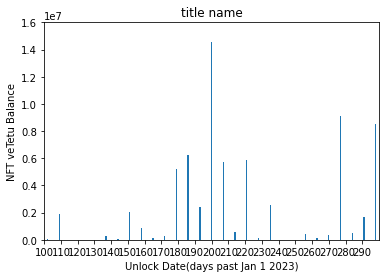

In [15]:
import matplotlib.pyplot as plt
import numpy as np


x_axis = lockedEndListFormatted
y_axis = lockedDerivedAmountListFormatted

plt.bar(x_axis, y_axis)
plt.axis([100, 300, 0, 16000000])
plt.title('title name')
plt.xlabel('Unlock Date(days past Jan 1 2023)')
plt.ylabel('NFT veTetu Balance')
plt.xticks(np.arange(100,300, 10))

plt.show()



In [16]:
largeNFTList = []
largeNFTListInt = []
unlockedList = []
unlockedListInt = []
for i in range(len(lockedDerivedAmountListFormatted)):
    if lockedDerivedAmountListFormatted[i] > 100000:
        print('ID: ' + str(i) + ', ' + str(lockedDerivedAmountListFormatted[i]) + ', date: ' + str(lockedEndListFormatted[i]))
        largeNFTList.append(str(lockedDerivedAmountListFormatted[i]) + ', date: ' + str(lockedEndListFormatted[i]))
        largeNFTListInt.append(lockedDerivedAmountListFormatted[i])
    if lockedEndListFormatted[i] < 140:
        unlockedListInt.append(lockedDerivedAmountListFormatted[i])
        if lockedDerivedAmountListFormatted[i] > 2000000:
            unlockedList.append('ID: ' + str(i) + ', ' + str(lockedDerivedAmountListFormatted[i]) + ', date: ' + str(lockedEndListFormatted[i]))
print(sum(lockedDerivedAmountListFormatted))
print(sum(largeNFTListInt))
print(unlockedList)
print(sum(unlockedListInt))

ID: 7, 9097143.812162118, date: 277.0
ID: 8, 5344249.610559565, date: 298.0
ID: 9, 184443.65155209077, date: 200.0
ID: 14, 8498459.87667031, date: 298.0
ID: 17, 113411.93198274415, date: 270.0
ID: 18, 1656267.7988607213, date: 291.0
ID: 20, 1048954.617678732, date: 298.0
ID: 21, 105784.0047925471, date: 270.0
ID: 34, 233941.8487019429, date: 214.0
ID: 36, 113728.32494934925, date: 291.0
ID: 47, 14590785.220091775, date: 200.0
ID: 57, 5849702.1451754635, date: 221.0
ID: 66, 5724963.1187598435, date: 207.0
ID: 69, 107182.85274772887, date: 228.0
ID: 73, 503423.8928645144, date: 221.0
ID: 76, 608306.4504659759, date: 214.0
ID: 82, 1100134.1132275318, date: 298.0
ID: 87, 2555202.0757717346, date: 235.0
ID: 95, 324019.8490931061, date: 221.0
ID: 124, 714251.5594549646, date: 291.0
ID: 136, 251598.95573841364, date: 172.0
ID: 150, 117091.16953794849, date: 165.0
ID: 156, 154348.46141932244, date: 298.0
ID: 159, 2063399.3158421135, date: 151.0
ID: 161, 307005.208700423, date: 137.0
ID: 162, 5